# Lab-2: Linear Regression.
_____
##### In this lab, you will Practice applying different Regression algorithms, and play with models to experiece underfitting vs. overfitting.

### Objectives:

1. Simple Linear Regression
2. Multiple Linear Regression
3. Polynomial Regression



### Regression
1. What is linear regression?
<span style="color:blue">Regression searches for relationships among variables. Generally, in regression analysis, we usually consider some phenomenon of interest and have a number of observations. Each observation has two or more features. Following the assumption that (at least) one of the features depends on the others, we try to establish a relation among them. The dependent features are called the dependent variables, outputs, or responses. The independent features are called the independent variables, inputs, or predictors.</span>
2. When Do We Need Regression?
<span style="color:blue"> Typically, we need regression to answer whether and how some phenomenon influences the other or how several variables are related. For example, we can use it to determine if and to what extent the experience or gender impact salaries. </span>


### Linear Regression
1. What is linear regression?
<span style="color:blue">When implementing linear regression of some dependent variable 𝑦 on the set of independent variables 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of predictors, we assume a linear relationship between 𝑦 and 𝐱: 𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀. This equation is the regression equation. 𝛽₀, 𝛽₁, …, 𝛽ᵣ are the regression coefficients, and 𝜀 is the random irreducible error.

</span>

#####  In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


##### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load and Explore the dataset 

In [4]:
dataset = pd.read_csv('student_scores.csv')
dataset.shape

(25, 2)

In [5]:
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Data Plotting:
plot the data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data:

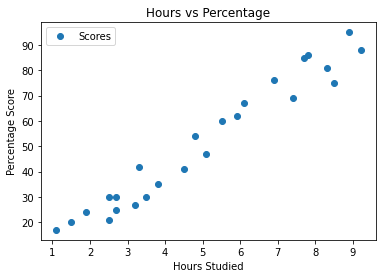

In [7]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### Data Preparation

In [8]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Build Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434683
[9.91065648]


#### Evaluate the performance of the linear regression model on test dataset

In [10]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Task: Measure the performance of the model using the (1) root mean squared error, (2) mean absolute error and coefficient of determination $R^2$.

Q: What RMSE, MSE and R-squared tell us?
<span style="color:blue"> Both RMSE and MSE tell us how much our predictions will be away from the truth on average.
$R^2$ tells us the proportion of the variance/variability in the Y was explained by the model via the explanatory variables.


In [11]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


### Multiple Linear Regression
Linear regression involving multiple variables is called "multiple linear regression"
We will use multiple linear regression to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license.
We seek a model of the form:

     B = A0 * X0 + A1 * X1 + A2 * X2 + A3 * X3 + A4 * X4.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Load and Explore the dataset 

In [13]:
%matplotlib inline
dataset = pd.read_csv('petrol_consumption.csv')


In [14]:
dataset.head()


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


#### Data preparation

In [15]:

X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#### Building Linear Regression model

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [17]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


#### Evaluate the performance of the linear regression model on test dataset
Task: Use the predict function in the model to predict the output of the testset and call it $y\_pred$.
And print it.

In [18]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


Measure the performance of the model using the (1) root mean squared error, (2) mean absolute error and coefficient of determination $R^2$.

In [19]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Root Mean Squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 56.822247478964684
Mean Squared Error: 68.31064915215165
Root Mean Squared Error: 0.2036193241012182


### Polynomial Regression
Polynomial Regression, is simply a transformation for the explanatory variables to higher polynomial orders with interactive variables.
1. Why do we need it?
<span style="color:blue"> One of the main assumptions of LR is the "linearity": that the relationship between X and y is linear. If this assumption doesn't hold, we need to transform the X to be close to the linearity.
1. Which order of the polynomial should we choose? 
<span style="color:blue"> Clearly, the higher the order of the polynomial, the higher the complexity of the model. This is true both computationally and conceptually because in both cases we now have a higher number of adaptable parameters. The higher the complexity of a model the more variance it can capture. Choosing the order of the model depends on the variance-bias trade-off of the model. </span>
2. should we always pick the most complex model? 
<span style="color:blue"> No: we have to strike a balance between variance and (inductive) bias: our model needs to have sufficient complexity to model the relationship between the predictors and the response, but it must have the ability to generalize to new, unseen cases. </span>

#### We will create a synthetic dataset by adding some random gaussian noise to a cosinusoidal function.

#### Import Libraries

In [20]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



Automatically created module for IPython interactive environment


#### Create sinusoidal function

In [21]:

def true_fun(X):
    return np.cos(1.5 * np.pi * X)


#### Create a synthetic dataset by adding some random gaussian noise to a cosinusoidal function

In [22]:

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1


#### We will build three polynomial models with degrees [1, 4, 15] and observe the effect of increasing the degree of complixity of the model on how well it suits the data.


Task: Write a pipeline of PolynomialFeatures transformation then, LinearRegression mode to be applied on X & y.
Then get the cross validation scores with the appropriate scoring argument with k = 10.

Q: What's your observation?
<span style="color:blue">The first model with degree with degree 1 is linear, very simple, and very fast to compute but it suffers from underfitting since it does not fir the training or the testing datasets. The second model with degree 4 looks suilable for the data. The third model with degree 15 fits the training dataset too much and suffers from underfitting.

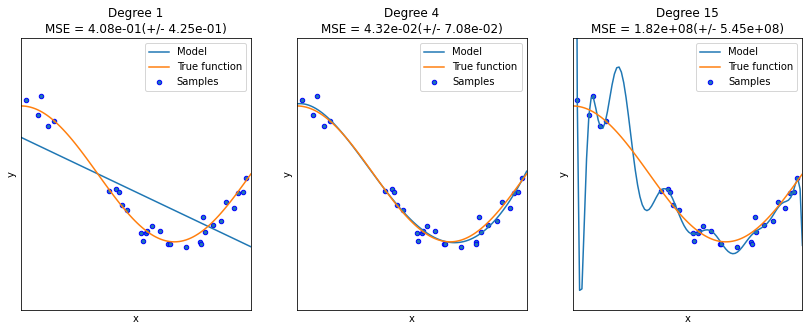

In [23]:

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()